# Random Variables

A random variable represents all the possible sets of events an outcome can take. There are two kinds of random variables, continuous and discrete. Events such as coin tosses, dice throws and card games are events that can be represented using discrete random variables, while values of body heat, atmospheric pressure and student grade point averages(GPA) represents continuous random variables. By representing events using random variables we can simplify our analysis using properties such as Bayes Theorem, product rule and marginals. In this lecture we explore the potential uses of such techniques on a dataset.

We will again use the [student alcohol consumption](https://www.kaggle.com/uciml/student-alcohol-consumption/home) dataset, used in the previous lecture, which has various attributes corresponding to social and education information of students in secondary school.

<span style="color:red">NOTE:</span> Download the dataset and add them to the folder where this notebook resides before continuing. Also review the notebook on Pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use([{
    "figure.figsize":(12,9), # Figure size
    "xtick.labelsize": "large", # Font size of the X-ticks
    "ytick.labelsize": "large", # Font size of the Y-ticks
    "legend.fontsize": "x-large", # Font size of the legend
    "axes.labelsize": "x-large", # Font size of labels
    "axes.titlesize": "xx-large", # Font size of title
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn-poster'])

We will use the `student-por.csv`. You can learn more about the dataset and its attributes [here](https://www.kaggle.com/uciml/student-alcohol-consumption/home). We are interested in the following attributes:
- `G3` - final grade related with the course subject, Math or Portuguese (numeric: from 0 to 20)  
- `school`- student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)  

Let $G$ and $S$ denote random values of these attributes. 

In [2]:
attributes = ['G3','school']
data_por = pd.read_csv("student-por.csv",usecols=attributes)

Using the data, we wish to find the distribution of the final grades for students in each school, i.e., $P(g|s)\triangleq P(G=g|S=s)$ $\forall g\in\{0,1,\ldots,20\}\ s\in\{\text{'GP'},\text{'MS'}\}$.
Let us use the concepts from random variables and  conditional probabilities to calculate these values.

We will use the approximation 
$$P(g|s)=\frac{\text{Number of students who scored g in school s}}{\text{Total number of students in school s}}$$

<b>Estimating $\mathbf{P(g|s)}$</b>

In [3]:
# For Gabriel Pereira
P_G3_given_S_GP = pd.DataFrame(index=range(21)).fillna(0)
data_temp = data_por.loc[data_por["school"]=="GP","G3"].value_counts()
P_G3_given_S_GP["Probability"] = (data_temp/data_temp.sum())
P_G3_given_S_GP = P_G3_given_S_GP.fillna(0)

# For Mousinho da Silveira
P_G3_given_S_MS = pd.DataFrame(index=range(21)).fillna(0)
data_temp = data_por.loc[data_por["school"]=="MS","G3"].value_counts()
P_G3_given_S_MS["Probability"] = data_temp/data_temp.sum()
P_G3_given_S_MS=P_G3_given_S_MS.fillna(0)

<Figure size 864x648 with 0 Axes>

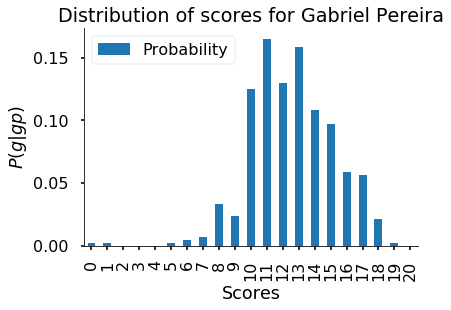

<Figure size 864x648 with 0 Axes>

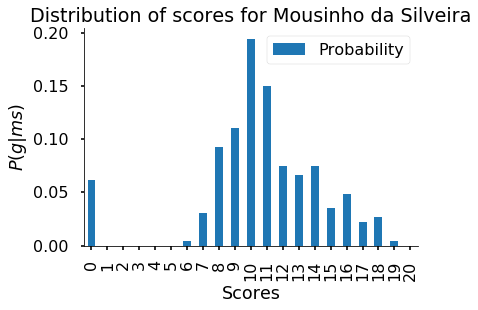

In [4]:
plt.figure(figsize=(12,9))
P_G3_given_S_GP.plot.bar()
plt.xlabel("Scores")
plt.ylabel("$P(g|gp)$")
plt.title("Distribution of scores for Gabriel Pereira")
plt.show()

plt.figure(figsize=(12,9))
P_G3_given_S_MS.plot.bar()
plt.xlabel("Scores")
plt.ylabel("$P(g|ms)$")
plt.title("Distribution of scores for Mousinho da Silveira")
plt.show()

Next, we combine the distributions of the two schools. By the addition and product rules,

$$P(g) = P(g,gp)+P(g,ms) = P(gp)P(g|gp)+P(ms)P(g|ms)$$.

We already calculated $P(g|s)$ and now we have to calculate the probability $P(s)$ that a student belongs to a given school.

<b>Estimating $\mathbf{P(s)}$</b> 

In [ ]:
data_temp = data_por["school"].value_counts()
P_S = pd.DataFrame(data_temp/data_temp.sum())
P_S.columns=["Probability"]
P_S.columns.name = "School"
P_S.plot.bar()

<b>Estimating $\mathbf{P(g)}$</b>

In [ ]:
P_G3 = P_G3_given_S_GP*P_S.loc["GP"].values+P_G3_given_S_MS*P_S.loc["MS"].values
plt.figure(figsize=(12,9))
P_G3.plot.bar()
plt.xlabel("Scores")
plt.ylabel("$P(g)$")
plt.title("Distribution of scores for both schools")
plt.show()

# Expectation 

Using the above estimated distributions we can find the expected scores using the following equations:
$$E[G\ |\ S=s] = \sum_{g=0}^{20}gP(g|s) \ \ s\in\{\text{Gabriel Pereira},\text{Mousinho da Silveira}\}$$
$$E[G] = \sum_{g=0}^{20}gP(g)$$

$\mathbf{E[G\ |\ S=\text{Gabriel Pereira}]}$:

In [ ]:
E_G3_given_S_GP = np.sum([index*value for index,value in zip(P_G3_given_S_GP.index,P_G3_given_S_GP.values)])
print("E[G|S = Gabriel Pereira]= {:.3f}".format(E_G3_given_S_GP))

$\mathbf{E[G\ |\ S=\text{Mousinho da Silveira}]}$:

In [ ]:
E_G3_given_S_MP = np.sum([index*value for index,value in zip(P_G3_given_S_MS.index,P_G3_given_S_MS.values)])
print("E[G|S=Mousubho da Silveira] {:.3f}".format(E_G3_given_S_MP))

$\mathbf{E[G]}$ :

In [ ]:
E_G3 = np.sum([index*value for index,value in zip(P_G3.index,P_G3.values)])
print("E[G] = {:.3f}".format(E_G3))